In [54]:
import requests
import time
import random
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

### Conexión a API y descarga de información

In [3]:
# Configuración
CATEGORY_ID = "MLM438078"  # ID de la categoría - Audio
SITE_ID = "MLM"           # ID del sitio
LIMIT = 50                # Máximo de items por solicitud
MAX_ITEMS = 1000          # Número máximo de items a obtener
SEARCH_URL = f"https://api.mercadolibre.com/sites/{SITE_ID}/search"
ITEM_URL = "https://api.mercadolibre.com/items/{item_id}"
SELLER_URL = "https://api.mercadolibre.com/users/{seller_id}"
CATEGORY_URL = f"https://api.mercadolibre.com/categories/{CATEGORY_ID}"  # URL para obtener información de la categoría

# Paso 1: Obtener la información completa de la categoría
response = requests.get(CATEGORY_URL)
if response.status_code == 200:
    category_data = response.json()
    category_path = category_data.get("path_from_root", [])
    category_name = category_path[-1]["name"] if category_path else "Desconocido"  # Nombre de la categoría más profunda
    print(f"Categoría obtenida: {category_name}")
else:
    print(f"Error al obtener información de la categoría: {response.status_code}")
    category_name = "Desconocido"

# Paso 2: Obtener item_id de todos los registros disponibles
item_ids = []
offset = 0
items_data = []  # Lista para almacenar los datos completos de los items

while True:
    # Construir URL de búsqueda
    search_url = f"{SEARCH_URL}?category={CATEGORY_ID}&offset={offset}&limit={LIMIT}"
    response = requests.get(search_url)
    
    # Procesar datos
    data = response.json()
    items = data.get("results", [])
    if not items:  # Si no hay más resultados, salir del bucle
        break
    
    for item in items:
        item_data = {
            "id": item["id"],
            "title": item["title"],
            "price": item["price"],
            "currency_id": item["currency_id"],
            "available_quantity": item["available_quantity"],
            "seller_id": item["seller"]["id"],
            "condition": item["condition"],
            "category_path": category_path  
        }
        items_data.append(item_data)
        item_ids.append(item["id"])
    
    # Avanzar en la paginación
    offset += LIMIT
    
    # Progreso
    print(f"Items obtenidos hasta ahora: {len(item_ids)}")
    
    # Pausa para evitar saturar la API
    time.sleep(0.2)

print(f"Total de items disponibles: {len(item_ids)}")

# Paso 3: Seleccionar aleatoriamente 1000 registros
if len(items_data) > MAX_ITEMS:
    random_items = random.sample(items_data, MAX_ITEMS)
else:
    random_items = items_data

# Guardar la información de los items seleccionados en un archivo JSON
with open("random_items_info_with_category_path.json", "w", encoding="utf-8") as file:
    json.dump(random_items, file, ensure_ascii=False, indent=4)

print(f"Información aleatoria de {len(random_items)} items guardada en 'random_items_info_with_category_path.json'.")

# Paso 4: Obtener seller_id para cada item_id seleccionado
seller_ids = {item["seller_id"] for item in random_items}  # Conjunto de IDs únicos de vendedores
seller_data = []

for seller_id in seller_ids:
    seller_url = SELLER_URL.format(seller_id=seller_id)
    response = requests.get(seller_url)
    
    if response.status_code != 200:
        print(f"Error al obtener información del seller {seller_id}: {response.status_code}")
        continue
    
    # Guardar datos del seller
    seller_info = response.json()
    seller_data.append(seller_info)
    
    # Progreso
    print(f"Información obtenida del seller {seller_id}: {seller_info.get('nickname', 'Desconocido')}")
    
    # Pausa para evitar saturar la API
    time.sleep(0.2)

# Guardar la información de los sellers en un archivo JSON
with open("sellers_info_with_category_path.json", "w", encoding="utf-8") as file:
    json.dump(seller_data, file, ensure_ascii=False, indent=4)

print(f"Información de {len(seller_data)} sellers guardada en 'sellers_info_with_category_path.json'.")


Categoría obtenida: Audio
Items obtenidos hasta ahora: 50
Items obtenidos hasta ahora: 100
Items obtenidos hasta ahora: 150
Items obtenidos hasta ahora: 200
Items obtenidos hasta ahora: 250
Items obtenidos hasta ahora: 300
Items obtenidos hasta ahora: 310
Items obtenidos hasta ahora: 360
Items obtenidos hasta ahora: 410
Items obtenidos hasta ahora: 460
Items obtenidos hasta ahora: 510
Items obtenidos hasta ahora: 553
Items obtenidos hasta ahora: 603
Items obtenidos hasta ahora: 653
Items obtenidos hasta ahora: 703
Items obtenidos hasta ahora: 752
Items obtenidos hasta ahora: 802
Items obtenidos hasta ahora: 852
Items obtenidos hasta ahora: 863
Items obtenidos hasta ahora: 913
Total de items disponibles: 913
Información aleatoria de 913 items guardada en 'random_items_info_with_category_path.json'.
Información obtenida del seller 239417354: AUDOMAZ
Información obtenida del seller 1447155724: CHAYE SHOP
Información obtenida del seller 1257900050: MARZSEFLOMARZSEFLO202212071951
Informació

Información obtenida del seller 1989694002: USNORTECHDISTRIBUTIONSLMXF
Información obtenida del seller 339102273: AUDIOBAHN.MÉXICO
Información obtenida del seller 97126978: EBAZARMX2024
Información obtenida del seller 800668233: QCYOFFICIALSTOREMX
Información obtenida del seller 1141072459: TODOWEB.COM.MX
Información obtenida del seller 1743696461: TOTALYITO1
Información obtenida del seller 1353869903: VENUS MUSIC_ONLINE
Información obtenida del seller 522046035: YOKACASAS
Información obtenida del seller 173898328: LAVE1936089
Información obtenida del seller 1390912089: CNOZMATIP-MXF
Información obtenida del seller 1139098202: OUOTECHSADECVOUOTECHSAD
Información obtenida del seller 1489850979: XOPEXLD
Información obtenida del seller 125291116: CONTROL EXPERT
Información obtenida del seller 1675166323: ZEZE20240209190018
Información obtenida del seller 1221790326: TIENDAOFICIALH
Información obtenida del seller 1935716993: ALIAN_BO
Información obtenida del seller 1310012046: CNCHAN1-MXF


Información obtenida del seller 1661977765: CNTECHHUBSHOPMXF
Información obtenida del seller 1943491756: MM20240812232132
Información obtenida del seller 632018094: DEMJESSTECNOLOGIAS
Información obtenida del seller 203353273: NUUPP
Información obtenida del seller 1505791162: CNHAVITDIRECTMXF
Información obtenida del seller 748707003: BESTPICKMX
Información obtenida del seller 1895789759: HR20240711183234
Información obtenida del seller 1319802059: CNMECHEN-MXF
Información obtenida del seller 1501037771: CNLENOVO1MXF
Información obtenida del seller 1507116236: HOLLYLANDOFFICIALSTOREMXF
Información obtenida del seller 1132836063: HKBUENATIENDA-MXF
Información obtenida del seller 1060547829: FLVINC
Información obtenida del seller 182998264: ARACECOMMERCE
Información obtenida del seller 692163833: XUHUIMENGMX4
Información obtenida del seller 535252227: LEGEND TEC.
Información obtenida del seller 175820037: ROBO_LIGHTS
Información obtenida del seller 1330652424: ACHOICE SHOP
Información ob

Información obtenida del seller 222789411: LIVING SOUND
Información obtenida del seller 835661607: LASANTA PRIME
Información obtenida del seller 639733552: XDOBOMX
Información obtenida del seller 1143428914: USWIRELESSEXPERTSINC-MXF1
Información obtenida del seller 153302840: STERENCENTROELECTRNICASTERE
Información obtenida del seller 726294329: DISTRIBUIDORAMUSICALMULTI
Información obtenida del seller 13553468: UNIVERSODIGITAL
Información obtenida del seller 254908222: LDMUSICAL
Información obtenida del seller 1210998606: BOTMX
Información obtenida del seller 75259727: ORDENA-MTY
Información obtenida del seller 76271445: PCDIGITALCOMMX
Información obtenida del seller 838125400: GM ECOMM
Información obtenida del seller 97177436: MYSTIC SOUL
Información obtenida del seller 1332862815: CNSDSODOCT-MXF
Información obtenida del seller 97314658: INNOVASTORE CUU
Información obtenida del seller 1267914606: CNVULATA-MXF
Información obtenida del seller 599332728: VCA AUDIO
Información obtenida d

In [7]:
# Cargar los datos de los items y sellers
with open("random_items_info_with_category_path.json", "r", encoding="utf-8") as file:
    items = json.load(file)

with open("sellers_info_with_category_path.json", "r", encoding="utf-8") as file:
    sellers = json.load(file)

# Crear un diccionario para acceder a los sellers por seller_id
seller_dict = {seller['id']: seller for seller in sellers}

# Combinar información de items con sellers y agregar category_path
items_with_sellers = []

for item in items:
    seller_id = item["seller_id"]
    seller_info = seller_dict.get(seller_id, None)  # Buscar seller por ID
    
    combined_info = {
        "item_id": item["id"],
        "item_title": item["title"],
        "item_price": item["price"],
        "currency_id": item["currency_id"],
        "available_quantity": item["available_quantity"],
        "condition": item["condition"],
        "category_path": item.get("category_path", []),  
        "seller_id": seller_id,
        "seller_nickname": seller_info["nickname"] if seller_info else "Desconocido",
        "seller_country": seller_info["country_id"] if seller_info else "Desconocido",
        "seller_user_type": seller_info["user_type"] if seller_info else "Desconocido",
        "seller_address": seller_info["address"] if seller_info else {"city": "Desconocido", "state": "Desconocido"},
        "seller_reputation": {
            "level_id": seller_info["seller_reputation"]["level_id"] if seller_info and "seller_reputation" in seller_info else "Desconocido",
            "power_seller_status": seller_info["seller_reputation"]["power_seller_status"] if seller_info and "seller_reputation" in seller_info else "Desconocido",
            "transactions": seller_info["seller_reputation"]["transactions"] if seller_info and "seller_reputation" in seller_info else {"period": "Desconocido", "total": 0}
        },
        "seller_status": seller_info["status"] if seller_info else {"site_status": "Desconocido"}
    }
    
    items_with_sellers.append(combined_info)

# Mostrar los primeros 5 registros combinados
for record in items_with_sellers[:5]:
    print(record)

# Guardar la información combinada en un archivo JSON nuevo
with open("items_with_sellers_and_category_path.json", "w", encoding="utf-8") as file:
    json.dump(items_with_sellers, file, ensure_ascii=False, indent=4)

print(f"Información combinada guardada en 'items_with_sellers_and_category_path.json'.")


{'item_id': 'MLM3518025342', 'item_title': 'Audífonos Inalámbricos Jbl Tune 510bt Jblt510bt Negro Con Luz Led', 'item_price': 581.4, 'currency_id': 'MXN', 'available_quantity': 50, 'condition': 'new', 'category_path': [{'id': 'MLM1000', 'name': 'Electrónica, Audio y Video'}, {'id': 'MLM438078', 'name': 'Audio'}], 'seller_id': 1986149970, 'seller_nickname': 'BE20240910105902', 'seller_country': 'MX', 'seller_user_type': 'normal', 'seller_address': {'city': 'Tepotzotlan', 'state': 'MX-MEX'}, 'seller_reputation': {'level_id': '5_green', 'power_seller_status': 'platinum', 'transactions': {'period': 'historic', 'total': 1790}}, 'seller_status': {'site_status': 'active'}}
{'item_id': 'MLM1994415181', 'item_title': 'Bocina Aiwa Boombox Aws244bt Portátil Con Bluetooth Waterproof Negra 127v', 'item_price': 1668.3, 'currency_id': 'MXN', 'available_quantity': 150, 'condition': 'new', 'category_path': [{'id': 'MLM1000', 'name': 'Electrónica, Audio y Video'}, {'id': 'MLM438078', 'name': 'Audio'}], 

In [8]:
# Cargar el archivo JSON guardado
with open('items_with_sellers_and_category_path.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Convertir los datos a un DataFrame de pandas
df3 = pd.DataFrame(data)


In [9]:
df3.head()

,item_id,item_title,item_price,currency_id,available_quantity,condition,category_path,seller_id,seller_nickname,seller_country,seller_user_type,seller_address,seller_reputation,seller_status
0,MLM3518025342,Audífonos Inalámbricos Jbl Tune 510bt Jblt510b...,581.40,MXN,50,new,"[{'id': 'MLM1000', 'name': 'Electrónica, Audio...",1986149970,BE20240910105902,MX,normal,"{'city': 'Tepotzotlan', 'state': 'MX-MEX'}","{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'}
1,MLM1994415181,Bocina Aiwa Boombox Aws244bt Portátil Con Blue...,1668.30,MXN,150,new,"[{'id': 'MLM1000', 'name': 'Electrónica, Audio...",423865692,AIWA MEXICO,MX,brand,"{'city': 'Huixquilucan', 'state': 'MX-MEX'}","{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'}
2,MLM3258118482,Haylou Audífonos S30 Anc Básico Con Cancelació...,589.00,MXN,50,new,"[{'id': 'MLM1000', 'name': 'Electrónica, Audio...",1209411360,CELL EXPRESSO,MX,brand,"{'city': 'Miguel Hidalgo', 'state': 'MX-DIF'}","{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'}
3,MLM2215015059,Bandeja Controlador De Dj Roland Dj707m Serato...,23290.00,MXN,1,new,"[{'id': 'MLM1000', 'name': 'Electrónica, Audio...",482152154,PLAZA_MUSICAL_SINFONIA,MX,brand,"{'city': 'Tehuacan', 'state': 'MX-PUE'}","{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'}
4,MLM1951371003,Auriculares In Ear Htc Tws12 Gamer Inalámbrico...,372.53,MXN,500,new,"[{'id': 'MLM1000', 'name': 'Electrónica, Audio...",742974626,HTCMX2MX1,MX,normal,"{'city': 'Tepotzotlan', 'state': 'MX-MEX'}","{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'}


In [10]:
df3.size

12782

In [11]:
df3['seller_id'].nunique()

438

In [12]:
df3['seller_reputation'].describe()

count                                                   913
unique                                                  437
top       {'level_id': '5_green', 'power_seller_status':...
freq                                                     33
Name: seller_reputation, dtype: object

In [13]:
#copiar df3 a df4
df4=df3.copy()
df4.head()

,item_id,item_title,item_price,currency_id,available_quantity,condition,category_path,seller_id,seller_nickname,seller_country,seller_user_type,seller_address,seller_reputation,seller_status
0,MLM3518025342,Audífonos Inalámbricos Jbl Tune 510bt Jblt510b...,581.40,MXN,50,new,"[{'id': 'MLM1000', 'name': 'Electrónica, Audio...",1986149970,BE20240910105902,MX,normal,"{'city': 'Tepotzotlan', 'state': 'MX-MEX'}","{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'}
1,MLM1994415181,Bocina Aiwa Boombox Aws244bt Portátil Con Blue...,1668.30,MXN,150,new,"[{'id': 'MLM1000', 'name': 'Electrónica, Audio...",423865692,AIWA MEXICO,MX,brand,"{'city': 'Huixquilucan', 'state': 'MX-MEX'}","{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'}
2,MLM3258118482,Haylou Audífonos S30 Anc Básico Con Cancelació...,589.00,MXN,50,new,"[{'id': 'MLM1000', 'name': 'Electrónica, Audio...",1209411360,CELL EXPRESSO,MX,brand,"{'city': 'Miguel Hidalgo', 'state': 'MX-DIF'}","{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'}
3,MLM2215015059,Bandeja Controlador De Dj Roland Dj707m Serato...,23290.00,MXN,1,new,"[{'id': 'MLM1000', 'name': 'Electrónica, Audio...",482152154,PLAZA_MUSICAL_SINFONIA,MX,brand,"{'city': 'Tehuacan', 'state': 'MX-PUE'}","{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'}
4,MLM1951371003,Auriculares In Ear Htc Tws12 Gamer Inalámbrico...,372.53,MXN,500,new,"[{'id': 'MLM1000', 'name': 'Electrónica, Audio...",742974626,HTCMX2MX1,MX,normal,"{'city': 'Tepotzotlan', 'state': 'MX-MEX'}","{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'}


In [14]:
# Normalizar la columna para extraer valores
seller_status_normalized = pd.json_normalize(df3['seller_status'],errors='ignore')
seller_reputation_normalized = pd.json_normalize(df3['seller_reputation'],errors='ignore')
seller_address_normalized = pd.json_normalize(df3['seller_address'],errors='ignore')

In [15]:
# Unir las nuevas columnas con el DataFrame original
df4=df3.join([seller_reputation_normalized,seller_status_normalized,seller_address_normalized])
df4.head()

,item_id,item_title,item_price,currency_id,available_quantity,condition,category_path,seller_id,seller_nickname,seller_country,...,seller_address,seller_reputation,seller_status,level_id,power_seller_status,transactions.period,transactions.total,site_status,city,state
0,MLM3518025342,Audífonos Inalámbricos Jbl Tune 510bt Jblt510b...,581.40,MXN,50,new,"[{'id': 'MLM1000', 'name': 'Electrónica, Audio...",1986149970,BE20240910105902,MX,...,"{'city': 'Tepotzotlan', 'state': 'MX-MEX'}","{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'},5_green,platinum,historic,1790,active,Tepotzotlan,MX-MEX
1,MLM1994415181,Bocina Aiwa Boombox Aws244bt Portátil Con Blue...,1668.30,MXN,150,new,"[{'id': 'MLM1000', 'name': 'Electrónica, Audio...",423865692,AIWA MEXICO,MX,...,"{'city': 'Huixquilucan', 'state': 'MX-MEX'}","{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'},5_green,platinum,historic,18784,active,Huixquilucan,MX-MEX
2,MLM3258118482,Haylou Audífonos S30 Anc Básico Con Cancelació...,589.00,MXN,50,new,"[{'id': 'MLM1000', 'name': 'Electrónica, Audio...",1209411360,CELL EXPRESSO,MX,...,"{'city': 'Miguel Hidalgo', 'state': 'MX-DIF'}","{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'},5_green,platinum,historic,107309,active,Miguel Hidalgo,MX-DIF
3,MLM2215015059,Bandeja Controlador De Dj Roland Dj707m Serato...,23290.00,MXN,1,new,"[{'id': 'MLM1000', 'name': 'Electrónica, Audio...",482152154,PLAZA_MUSICAL_SINFONIA,MX,...,"{'city': 'Tehuacan', 'state': 'MX-PUE'}","{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'},5_green,platinum,historic,8798,active,Tehuacan,MX-PUE
4,MLM1951371003,Auriculares In Ear Htc Tws12 Gamer Inalámbrico...,372.53,MXN,500,new,"[{'id': 'MLM1000', 'name': 'Electrónica, Audio...",742974626,HTCMX2MX1,MX,...,"{'city': 'Tepotzotlan', 'state': 'MX-MEX'}","{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'},5_green,platinum,historic,46482,active,Tepotzotlan,MX-MEX


In [16]:
# Crear columnas separadas para categoría principal y subcategoría
df4['category_id'] = df4['category_path'].apply(lambda x: x[0]['id'] if len(x) > 0 else None)
df4['category_name'] = df4['category_path'].apply(lambda x: x[0]['name'] if len(x) > 0 else None)

df4['sub_category_id'] = df4['category_path'].apply(lambda x: x[1]['id'] if len(x) > 1 else None)
df4['sub_category_name'] = df4['category_path'].apply(lambda x: x[1]['name'] if len(x) > 1 else None)

# Mostrar las primeras filas del DataFrame resultante
df4[['category_id', 'category_name', 'sub_category_id', 'sub_category_name']].head()


,category_id,category_name,sub_category_id,sub_category_name
0,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio
1,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio
2,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio
3,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio
4,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio


In [17]:
df4.head()

,item_id,item_title,item_price,currency_id,available_quantity,condition,category_path,seller_id,seller_nickname,seller_country,...,power_seller_status,transactions.period,transactions.total,site_status,city,state,category_id,category_name,sub_category_id,sub_category_name
0,MLM3518025342,Audífonos Inalámbricos Jbl Tune 510bt Jblt510b...,581.40,MXN,50,new,"[{'id': 'MLM1000', 'name': 'Electrónica, Audio...",1986149970,BE20240910105902,MX,...,platinum,historic,1790,active,Tepotzotlan,MX-MEX,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio
1,MLM1994415181,Bocina Aiwa Boombox Aws244bt Portátil Con Blue...,1668.30,MXN,150,new,"[{'id': 'MLM1000', 'name': 'Electrónica, Audio...",423865692,AIWA MEXICO,MX,...,platinum,historic,18784,active,Huixquilucan,MX-MEX,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio
2,MLM3258118482,Haylou Audífonos S30 Anc Básico Con Cancelació...,589.00,MXN,50,new,"[{'id': 'MLM1000', 'name': 'Electrónica, Audio...",1209411360,CELL EXPRESSO,MX,...,platinum,historic,107309,active,Miguel Hidalgo,MX-DIF,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio
3,MLM2215015059,Bandeja Controlador De Dj Roland Dj707m Serato...,23290.00,MXN,1,new,"[{'id': 'MLM1000', 'name': 'Electrónica, Audio...",482152154,PLAZA_MUSICAL_SINFONIA,MX,...,platinum,historic,8798,active,Tehuacan,MX-PUE,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio
4,MLM1951371003,Auriculares In Ear Htc Tws12 Gamer Inalámbrico...,372.53,MXN,500,new,"[{'id': 'MLM1000', 'name': 'Electrónica, Audio...",742974626,HTCMX2MX1,MX,...,platinum,historic,46482,active,Tepotzotlan,MX-MEX,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio


In [18]:
# Eliminar la columna original si ya no es necesaria
df4 = df4.drop(columns=['category_path'])

In [19]:
df4

,item_id,item_title,item_price,currency_id,available_quantity,condition,seller_id,seller_nickname,seller_country,seller_user_type,...,power_seller_status,transactions.period,transactions.total,site_status,city,state,category_id,category_name,sub_category_id,sub_category_name
0,MLM3518025342,Audífonos Inalámbricos Jbl Tune 510bt Jblt510b...,581.40,MXN,50,new,1986149970,BE20240910105902,MX,normal,...,platinum,historic,1790,active,Tepotzotlan,MX-MEX,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio
1,MLM1994415181,Bocina Aiwa Boombox Aws244bt Portátil Con Blue...,1668.30,MXN,150,new,423865692,AIWA MEXICO,MX,brand,...,platinum,historic,18784,active,Huixquilucan,MX-MEX,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio
2,MLM3258118482,Haylou Audífonos S30 Anc Básico Con Cancelació...,589.00,MXN,50,new,1209411360,CELL EXPRESSO,MX,brand,...,platinum,historic,107309,active,Miguel Hidalgo,MX-DIF,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio
3,MLM2215015059,Bandeja Controlador De Dj Roland Dj707m Serato...,23290.00,MXN,1,new,482152154,PLAZA_MUSICAL_SINFONIA,MX,brand,...,platinum,historic,8798,active,Tehuacan,MX-PUE,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio
4,MLM1951371003,Auriculares In Ear Htc Tws12 Gamer Inalámbrico...,372.53,MXN,500,new,742974626,HTCMX2MX1,MX,normal,...,platinum,historic,46482,active,Tepotzotlan,MX-MEX,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,MLM3104937034,Bocina 15 PuLG Kaiser Mwf-1540 Doble Bobina 50...,399.00,MXN,1,new,93319693,MAGIA DIGITAL,MX,brand,...,platinum,historic,242094,active,Alvaro Obregón,MX-DIF,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio
909,MLM2257575382,Audifonos Alambricos Philips Taue100bk/00 Colo...,99.00,MXN,150,new,826864952,GRUPO ASMAKTEC,MX,normal,...,platinum,historic,44810,active,Zapopan,MX-JAL,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio
910,MLM2158101071,Audífonos Inalámbricos Con Microfono Bluetooth...,227.37,MXN,1,new,743567276,MIMI3704040,MX,normal,...,platinum,historic,53399,active,Cuauhtémoc,MX-DIF,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio
911,MLM2211724475,Behringer P2 Amplificador Para Audífonos Monit...,1770.00,MXN,1,new,97177436,MYSTIC SOUL,MX,normal,...,platinum,historic,5802,active,Cuauhtémoc,MX-DIF,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio


In [20]:
df4.describe()

,item_price,available_quantity,seller_id,transactions.total
count,913.000000,913.000000,9.130000e+02,9.130000e+02
mean,1439.929901,95.518072,8.042818e+08,8.367035e+04
std,2566.844349,217.745042,5.760656e+08,2.334783e+05
min,41.400000,1.000000,1.901931e+06,2.700000e+01
25%,291.000000,1.000000,2.023432e+08,6.808000e+03
50%,520.000000,1.000000,7.429746e+08,1.974500e+04
75%,1499.000000,150.000000,1.338219e+09,7.279900e+04
max,26539.000000,5000.000000,2.135263e+09,2.422426e+06


In [21]:
df4['seller_id'].duplicated().sum()

475

In [22]:
df4['seller_id'].count()

913

In [23]:
df4.isnull().sum()

item_id                 0
item_title              0
item_price              0
currency_id             0
available_quantity      0
condition               0
seller_id               0
seller_nickname         0
seller_country          0
seller_user_type        0
seller_address          0
seller_reputation       0
seller_status           0
level_id                0
power_seller_status    41
transactions.period     0
transactions.total      0
site_status             0
city                    0
state                   0
category_id             0
category_name           0
sub_category_id         0
sub_category_name       0
dtype: int64

In [24]:
df4[df4.isnull().any(axis=1)]

,item_id,item_title,item_price,currency_id,available_quantity,condition,seller_id,seller_nickname,seller_country,seller_user_type,...,power_seller_status,transactions.period,transactions.total,site_status,city,state,category_id,category_name,sub_category_id,sub_category_name
217,MLM3508559520,Bocina Portátil Jbl Partybox On The Go Essenti...,4558.00,MXN,1,new,198067881,PC ONETIJ,MX,normal,...,None,historic,8934,active,Tijuana,MX-BCN,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio
232,MLM3231549414,2 Pzas-zenipower Z52h Para Sony Linkbuds S C/k...,637.50,MXN,1,new,44512246,SAN_FABIAN,MX,normal,...,None,historic,900,active,Querétaro,MX-QUE,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio
259,MLM2146423969,Audifonos Inalambricos Google Pixel Buds Pro T...,3203.73,MXN,50,new,1989694002,USNORTECHDISTRIBUTIONSLMXF,US,normal,...,None,historic,33,active,China Grove,US-TX,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio
288,MLM2139005875,Audifonos Inalambricos Bluetooth Stitch Color ...,299.00,MXN,250,new,1775028324,REES20240416222951,MX,normal,...,None,historic,142,active,Cuauhtémoc,MX-DIF,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio
308,MLM2642580750,Audífonos Bluetooth Auriculares Para Dormir,170.10,MXN,1,new,1503601788,BAOQISHOP,MX,normal,...,None,historic,570,active,Cuauhtémoc,MX-DIF,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio
323,MLM3154197652,Audifonos Bluetooth Inalámbricos Tws Florela E...,299.00,MXN,1,new,333223653,ABCYMAS,MX,normal,...,None,historic,4898,active,Tlaquepaque,MX-JAL,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio
326,MLM2134014429,Audífonos Xiaomi Redmi Buds 5 White Color Blanco,839.00,MXN,500,new,1089793114,IXIX8340796,MX,brand,...,None,historic,34193,active,Gustavo A. Madero,MX-DIF,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio
333,MLM2199228055,Bocina Bluetooth 5.1 Portátil 1hora Boc060 Ina...,201.16,MXN,1,new,2135262641,OKAECOMMERCE,MX,normal,...,None,historic,440,active,Puebla,MX-PUE,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio
336,MLM2718766910,Bocina Inalámbrica Portátil Cilindrica Bluetoo...,110.50,MXN,1,new,1486538039,AAELECTRONICHOME,MX,normal,...,None,historic,319,active,Durango,MX-DUR,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio
416,MLM2199286821,Audifonos Inalambricos 1hora In-ear Auriculare...,159.20,MXN,1,new,2135262641,OKAECOMMERCE,MX,normal,...,None,historic,440,active,Puebla,MX-PUE,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio


In [25]:
df4['power_seller_status'] = df4['power_seller_status'].fillna('Desconocido')

In [26]:
df4.isnull().sum()

item_id                0
item_title             0
item_price             0
currency_id            0
available_quantity     0
condition              0
seller_id              0
seller_nickname        0
seller_country         0
seller_user_type       0
seller_address         0
seller_reputation      0
seller_status          0
level_id               0
power_seller_status    0
transactions.period    0
transactions.total     0
site_status            0
city                   0
state                  0
category_id            0
category_name          0
sub_category_id        0
sub_category_name      0
dtype: int64

In [27]:
df4

,item_id,item_title,item_price,currency_id,available_quantity,condition,seller_id,seller_nickname,seller_country,seller_user_type,...,power_seller_status,transactions.period,transactions.total,site_status,city,state,category_id,category_name,sub_category_id,sub_category_name
0,MLM3518025342,Audífonos Inalámbricos Jbl Tune 510bt Jblt510b...,581.40,MXN,50,new,1986149970,BE20240910105902,MX,normal,...,platinum,historic,1790,active,Tepotzotlan,MX-MEX,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio
1,MLM1994415181,Bocina Aiwa Boombox Aws244bt Portátil Con Blue...,1668.30,MXN,150,new,423865692,AIWA MEXICO,MX,brand,...,platinum,historic,18784,active,Huixquilucan,MX-MEX,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio
2,MLM3258118482,Haylou Audífonos S30 Anc Básico Con Cancelació...,589.00,MXN,50,new,1209411360,CELL EXPRESSO,MX,brand,...,platinum,historic,107309,active,Miguel Hidalgo,MX-DIF,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio
3,MLM2215015059,Bandeja Controlador De Dj Roland Dj707m Serato...,23290.00,MXN,1,new,482152154,PLAZA_MUSICAL_SINFONIA,MX,brand,...,platinum,historic,8798,active,Tehuacan,MX-PUE,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio
4,MLM1951371003,Auriculares In Ear Htc Tws12 Gamer Inalámbrico...,372.53,MXN,500,new,742974626,HTCMX2MX1,MX,normal,...,platinum,historic,46482,active,Tepotzotlan,MX-MEX,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,MLM3104937034,Bocina 15 PuLG Kaiser Mwf-1540 Doble Bobina 50...,399.00,MXN,1,new,93319693,MAGIA DIGITAL,MX,brand,...,platinum,historic,242094,active,Alvaro Obregón,MX-DIF,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio
909,MLM2257575382,Audifonos Alambricos Philips Taue100bk/00 Colo...,99.00,MXN,150,new,826864952,GRUPO ASMAKTEC,MX,normal,...,platinum,historic,44810,active,Zapopan,MX-JAL,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio
910,MLM2158101071,Audífonos Inalámbricos Con Microfono Bluetooth...,227.37,MXN,1,new,743567276,MIMI3704040,MX,normal,...,platinum,historic,53399,active,Cuauhtémoc,MX-DIF,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio
911,MLM2211724475,Behringer P2 Amplificador Para Audífonos Monit...,1770.00,MXN,1,new,97177436,MYSTIC SOUL,MX,normal,...,platinum,historic,5802,active,Cuauhtémoc,MX-DIF,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio


# Análisis exploratorio

### Creación de variables de valor 

In [28]:
df4.dtypes

item_id                 object
item_title              object
item_price             float64
currency_id             object
available_quantity       int64
condition               object
seller_id                int64
seller_nickname         object
seller_country          object
seller_user_type        object
seller_address          object
seller_reputation       object
seller_status           object
level_id                object
power_seller_status     object
transactions.period     object
transactions.total       int64
site_status             object
city                    object
state                   object
category_id             object
category_name           object
sub_category_id         object
sub_category_name       object
dtype: object

In [29]:
#Identifica productos con mayor potencial de ingresos.
df4['estimacion_ingresos'] = df4['item_price'] * df4['available_quantity']

In [30]:
# Ingresos estimado total por seller_id
revenue_por_seller = df4.groupby('seller_id')['estimacion_ingresos'].sum().reset_index()
revenue_por_seller.rename(columns={'estimacion_ingresos': 'total_revenue'}, inplace=True)

# Agregar al dataframe original
df4 = df4.merge(revenue_por_seller, on='seller_id', how='left')



In [31]:
# Productos únicos por seller_id
productos_unicos = df4.groupby('seller_id')['item_id'].nunique().reset_index()
productos_unicos.rename(columns={'item_id': 'unique_products'}, inplace=True)

# Agregar al dataframe original
df4 = df4.merge(productos_unicos, on='seller_id', how='left')



In [32]:
# Productos por estado
productos_por_estado = df4.groupby('state')['item_id'].count().reset_index()
productos_por_estado.rename(columns={'item_id': 'products_per_state'}, inplace=True)

# Agregar al dataframe original
df4 = df4.merge(productos_por_estado, on='state', how='left')

# Productos por ciudad
productos_por_ciudad = df4.groupby('city')['item_id'].count().reset_index()
productos_por_ciudad.rename(columns={'item_id': 'products_per_city'}, inplace=True)

# Agregar al dataframe original
df4 = df4.merge(productos_por_ciudad, on='city', how='left')


In [33]:
df4

,item_id,item_title,item_price,currency_id,available_quantity,condition,seller_id,seller_nickname,seller_country,seller_user_type,...,state,category_id,category_name,sub_category_id,sub_category_name,estimacion_ingresos,total_revenue,unique_products,products_per_state,products_per_city
0,MLM3518025342,Audífonos Inalámbricos Jbl Tune 510bt Jblt510b...,581.40,MXN,50,new,1986149970,BE20240910105902,MX,normal,...,MX-MEX,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio,29070.00,37604.21,4,416,213
1,MLM1994415181,Bocina Aiwa Boombox Aws244bt Portátil Con Blue...,1668.30,MXN,150,new,423865692,AIWA MEXICO,MX,brand,...,MX-MEX,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio,250245.00,1468385.30,8,416,11
2,MLM3258118482,Haylou Audífonos S30 Anc Básico Con Cancelació...,589.00,MXN,50,new,1209411360,CELL EXPRESSO,MX,brand,...,MX-DIF,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio,29450.00,719619.49,12,322,39
3,MLM2215015059,Bandeja Controlador De Dj Roland Dj707m Serato...,23290.00,MXN,1,new,482152154,PLAZA_MUSICAL_SINFONIA,MX,brand,...,MX-PUE,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio,23290.00,72218.99,7,23,7
4,MLM1951371003,Auriculares In Ear Htc Tws12 Gamer Inalámbrico...,372.53,MXN,500,new,742974626,HTCMX2MX1,MX,normal,...,MX-MEX,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio,186265.00,694044.50,5,416,213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,MLM3104937034,Bocina 15 PuLG Kaiser Mwf-1540 Doble Bobina 50...,399.00,MXN,1,new,93319693,MAGIA DIGITAL,MX,brand,...,MX-DIF,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio,399.00,48888.50,15,322,18
909,MLM2257575382,Audifonos Alambricos Philips Taue100bk/00 Colo...,99.00,MXN,150,new,826864952,GRUPO ASMAKTEC,MX,normal,...,MX-JAL,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio,14850.00,14850.00,1,53,12
910,MLM2158101071,Audífonos Inalámbricos Con Microfono Bluetooth...,227.37,MXN,1,new,743567276,MIMI3704040,MX,normal,...,MX-DIF,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio,227.37,227.37,1,322,130
911,MLM2211724475,Behringer P2 Amplificador Para Audífonos Monit...,1770.00,MXN,1,new,97177436,MYSTIC SOUL,MX,normal,...,MX-DIF,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio,1770.00,1770.00,1,322,130


In [34]:
# Verificar el tipo de datos, valores nulos y estadísticos generales
df4.info()
df4.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913 entries, 0 to 912
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   item_id              913 non-null    object 
 1   item_title           913 non-null    object 
 2   item_price           913 non-null    float64
 3   currency_id          913 non-null    object 
 4   available_quantity   913 non-null    int64  
 5   condition            913 non-null    object 
 6   seller_id            913 non-null    int64  
 7   seller_nickname      913 non-null    object 
 8   seller_country       913 non-null    object 
 9   seller_user_type     913 non-null    object 
 10  seller_address       913 non-null    object 
 11  seller_reputation    913 non-null    object 
 12  seller_status        913 non-null    object 
 13  level_id             913 non-null    object 
 14  power_seller_status  913 non-null    object 
 15  transactions.period  913 non-null    obj

,item_price,available_quantity,seller_id,transactions.total,estimacion_ingresos,total_revenue,unique_products,products_per_state,products_per_city
count,913.000000,913.000000,9.130000e+02,9.130000e+02,9.130000e+02,9.130000e+02,913.000000,913.000000,913.000000
mean,1439.929901,95.518072,8.042818e+08,8.367035e+04,6.342944e+04,4.598374e+05,5.368018,307.957284,85.170865
std,2566.844349,217.745042,5.760656e+08,2.334783e+05,1.530826e+05,1.070221e+06,6.885526,144.231567,80.788367
min,41.400000,1.000000,1.901931e+06,2.700000e+01,6.450000e+01,6.450000e+01,1.000000,1.000000,1.000000
25%,291.000000,1.000000,2.023432e+08,6.808000e+03,5.593000e+02,4.596000e+03,1.000000,322.000000,15.000000
50%,520.000000,1.000000,7.429746e+08,1.974500e+04,4.599000e+03,4.888850e+04,3.000000,322.000000,55.000000
75%,1499.000000,150.000000,1.338219e+09,7.279900e+04,5.438500e+04,2.764865e+05,6.000000,416.000000,130.000000
max,26539.000000,5000.000000,2.135263e+09,2.422426e+06,1.442500e+06,6.066722e+06,33.000000,416.000000,213.000000


#### Análisis Descriptivo de Variables Numéricas
Desempeño del Producto: Analiza el revenue_estimate de los productos para entender qué productos generan más ingresos.
Desempeño del Vendedor: Analiza el total_revenue para identificar a los vendedores más rentables. Y unique_products para ver qué tan activos son los vendedores y en cuántas categorías están presentes.

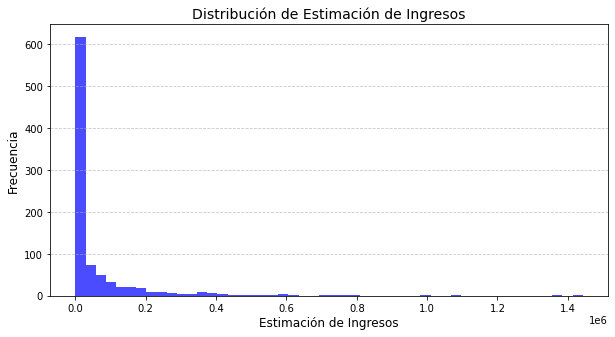

In [50]:
# Distribución de estimacion_ingresos
plt.figure(figsize=(10, 5))
plt.hist(df4['estimacion_ingresos'], bins=50, color='blue', alpha=0.7)
plt.title('Distribución de Estimación de Ingresos', fontsize=14)
plt.xlabel('Estimación de Ingresos', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

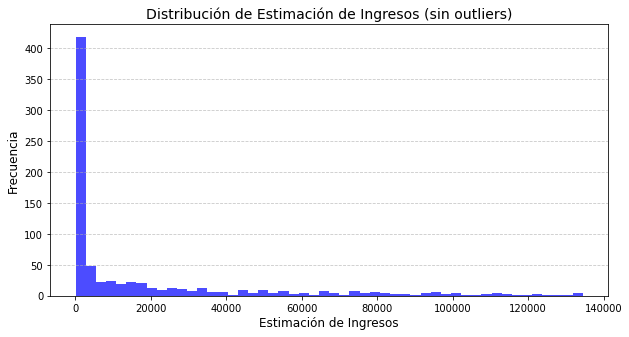

In [55]:
# Calcular el rango intercuartílico (IQR)
Q1 = df4['estimacion_ingresos'].quantile(0.25)
Q3 = df4['estimacion_ingresos'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los valores dentro de los límites
df_filtered = df4[(df4['estimacion_ingresos'] >= lower_bound) & (df4['estimacion_ingresos'] <= upper_bound)]

# Graficar el histograma sin outliers
plt.figure(figsize=(10, 5))
plt.hist(df_filtered['estimacion_ingresos'], bins=50, color='blue', alpha=0.7)
plt.title('Distribución de Estimación de Ingresos (sin outliers)', fontsize=14)
plt.xlabel('Estimación de Ingresos', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


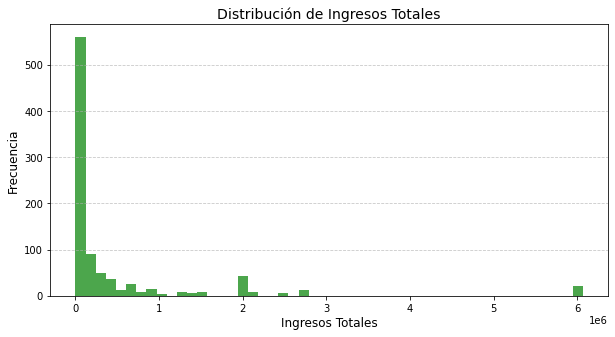

In [51]:
# Distribución de total_revenue
plt.figure(figsize=(10, 5))
plt.hist(df4['total_revenue'], bins=50, color='green', alpha=0.7)
plt.title('Distribución de Ingresos Totales', fontsize=14)
plt.xlabel('Ingresos Totales', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### Correlación y Relación entre Variables
Analiza las correlaciones entre las variables numéricas, como el total_revenue, unique_products y estimacion_ingresos.

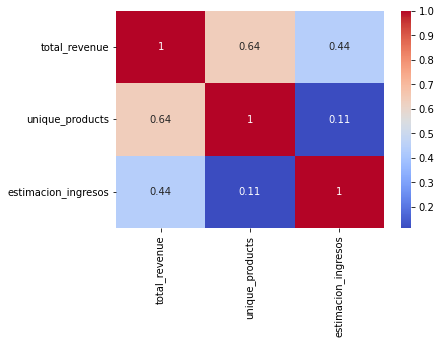

In [36]:
# Matriz de correlación
correlation_matrix = df4[['total_revenue', 'unique_products', 'estimacion_ingresos']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()


#### Análisis de Desempeño por Región Geográfica
Productos por región (state/city): Analiza cuántos productos están siendo ofrecidos en diferentes regiones, y si hay alguna correlación entre la ubicación y el desempeño de los vendedores.

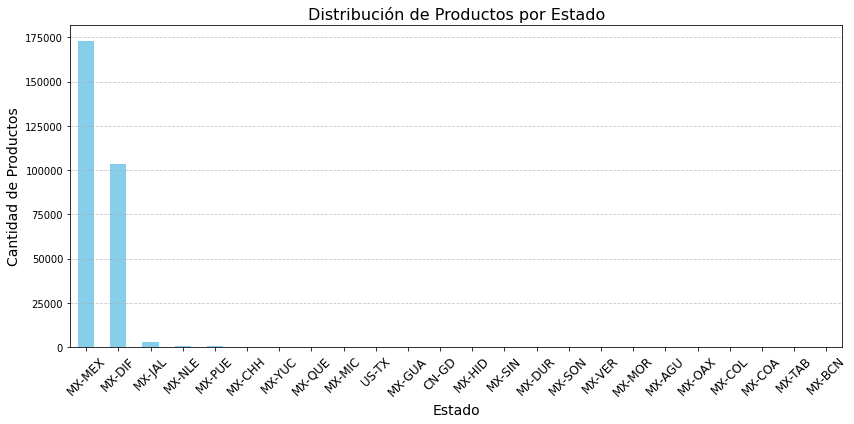

In [52]:
# Productos por estado
plt.figure(figsize=(12, 6))
df4.groupby('state')['products_per_state'].sum().sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Distribución de Productos por Estado', fontsize=16)
plt.xlabel('Estado', fontsize=14)
plt.ylabel('Cantidad de Productos', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

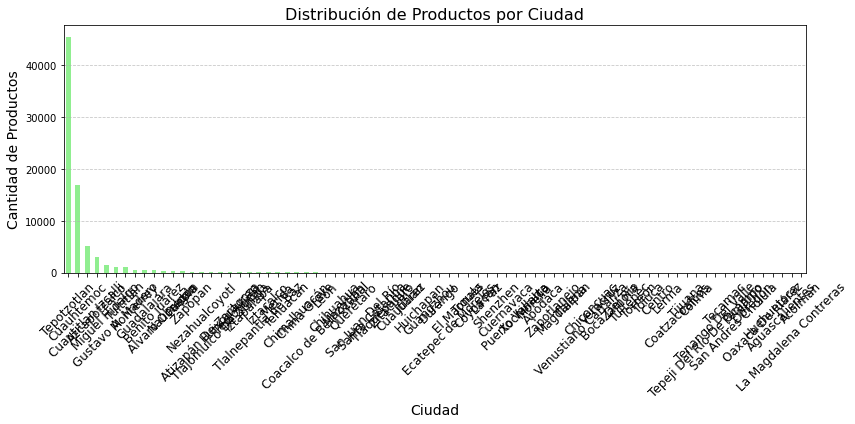

In [53]:
# Productos por ciudad
plt.figure(figsize=(12, 6))
df4.groupby('city')['products_per_city'].sum().sort_values(ascending=False).plot(kind='bar', color='lightgreen')
plt.title('Distribución de Productos por Ciudad', fontsize=16)
plt.xlabel('Ciudad', fontsize=14)
plt.ylabel('Cantidad de Productos', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Análisis de Productos con Mayor Potencial de Ingresos
Analiza qué productos tienen los ingresos más altos (producto por producto).

In [38]:
# Ordenar los productos por revenue_estimate
df4.sort_values(by='estimacion_ingresos', ascending=False).head(10)


,item_id,item_title,item_price,currency_id,available_quantity,condition,seller_id,seller_nickname,seller_country,seller_user_type,...,state,category_id,category_name,sub_category_id,sub_category_name,estimacion_ingresos,total_revenue,unique_products,products_per_state,products_per_city
525,MLM2052294767,Bocina Jbl Partybox 110 Portátil Con Bluetooth...,5770.00,MXN,250,new,399621798,SELECTSHOP MX,MX,brand,...,MX-DIF,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio,1442500.0,2679589.00,5,322,39
157,MLM3104915766,Micrófono Inalámbrico Solapa Hollyland Lark M2...,2879.00,MXN,500,new,635296573,PE SHOP,MX,brand,...,MX-DIF,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio,1439500.0,1439500.00,1,322,39
114,MLM1455114603,"Audífonos Sony Inalámbricos, Wh-1000xm5 Color ...",5699.00,MXN,250,new,192170993,SONYMXICOSADECVSONYM,MX,brand,...,MX-MEX,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio,1424750.0,6066722.00,22,416,71
88,MLM2646072708,Procesador De Audio Dbx 110v Driverack Drpa2 M...,6783.95,MXN,200,new,38213934,ARMONI1,MX,brand,...,MX-MEX,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio,1356790.0,1356790.00,1,416,33
164,MLM1500803900,"Bocina Bluetooth Bazooka Xbass Tws, 800 W Pmpo",2190.00,MXN,500,new,153302840,STERENCENTROELECTRNICASTERE,MX,brand,...,MX-DIF,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio,1095000.0,2687900.00,7,322,55
51,MLM1940188205,Audífonos True Wireless Con Noise Cancelling W...,3999.00,MXN,250,new,192170993,SONYMXICOSADECVSONYM,MX,brand,...,MX-MEX,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio,999750.0,6066722.00,22,416,71
67,MLM1967104835,Bafle Bocina Recargable 15 Pulgadas Kaiser Tri...,1968.81,MXN,500,new,50696408,GRUPO MARTIÑON,MX,brand,...,MX-MEX,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio,984405.0,1995836.38,33,416,71
196,MLM2603715006,Tronsmart Bangmax Parlante Bluetooth 130w Con ...,3147.20,MXN,250,new,696652924,TRONSMARTOFFICIALSTOREMX,MX,brand,...,MX-MEX,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio,786800.0,1355352.50,3,416,213
679,MLM1665197182,Audífonos Inalámbricos Over-ear Hesh Anc Skull...,1536.47,MXN,500,new,321537406,KRITECH,MX,brand,...,MX-DIF,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio,768235.0,881509.50,3,322,39
10,MLM1365534355,1hora Mini Bocina Portátil Bluetooth Inalámbri...,148.99,MXN,5000,new,535252227,LEGEND TEC.,MX,brand,...,MX-DIF,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio,744950.0,875387.50,3,322,130


#### Análisis de los Vendedores Más Rentables
Identifica a los vendedores con mayores ingresos utilizando total_revenue. Esto te ayudará a perfilar a los vendedores más exitosos.

In [39]:
# Vendedores con mayor total_ingresos
df4.sort_values(by='total_revenue', ascending=False).head(10)

,item_id,item_title,item_price,currency_id,available_quantity,condition,seller_id,seller_nickname,seller_country,seller_user_type,...,state,category_id,category_name,sub_category_id,sub_category_name,estimacion_ingresos,total_revenue,unique_products,products_per_state,products_per_city
394,MLM2183496415,Parlante Bluetooth Inalámbrico Portátil Sony S...,5999.0,MXN,1,new,192170993,SONYMXICOSADECVSONYM,MX,brand,...,MX-MEX,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio,5999.0,6066722.0,22,416,71
613,MLM857996229,Audífonos Sony Zx Series Mdr-zx310 Black,419.0,MXN,50,new,192170993,SONYMXICOSADECVSONYM,MX,brand,...,MX-MEX,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio,20950.0,6066722.0,22,416,71
114,MLM1455114603,"Audífonos Sony Inalámbricos, Wh-1000xm5 Color ...",5699.0,MXN,250,new,192170993,SONYMXICOSADECVSONYM,MX,brand,...,MX-MEX,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio,1424750.0,6066722.0,22,416,71
363,MLM3039875738,Audífonos Inalámbricos Ult Wear Color Blanco M...,2999.0,MXN,50,new,192170993,SONYMXICOSADECVSONYM,MX,brand,...,MX-MEX,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio,149950.0,6066722.0,22,416,71
33,MLM1964515515,Bocina Inalámbrica Para Fiestas Xv800 De La Se...,8999.0,MXN,1,new,192170993,SONYMXICOSADECVSONYM,MX,brand,...,MX-MEX,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio,8999.0,6066722.0,22,416,71
360,MLM2149066249,Bocina Sony Ult Field 7 Srs-ult70 Portátil Con...,7499.0,MXN,50,new,192170993,SONYMXICOSADECVSONYM,MX,brand,...,MX-MEX,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio,374950.0,6066722.0,22,416,71
594,MLM1939308477,"Audífonos Sony Wf-1000xm5, Color Gris Plata",3999.0,MXN,100,new,192170993,SONYMXICOSADECVSONYM,MX,brand,...,MX-MEX,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio,399900.0,6066722.0,22,416,71
85,MLM2149077943,Audífonos Sony True Wireless Wf-c510 Color Negro,999.0,MXN,500,new,192170993,SONYMXICOSADECVSONYM,MX,brand,...,MX-MEX,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio,499500.0,6066722.0,22,416,71
41,MLM2257380376,"Audífonos Inalámbricos Sony Wh-ch520, Color Azul",799.0,MXN,250,new,192170993,SONYMXICOSADECVSONYM,MX,brand,...,MX-MEX,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio,199750.0,6066722.0,22,416,71
668,MLM2568820678,Grabadora Digital De Voz Icd-ux570f Color Negro,1839.0,MXN,1,new,192170993,SONYMXICOSADECVSONYM,MX,brand,...,MX-MEX,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio,1839.0,6066722.0,22,416,71


#### Identificar Patrones de Ubicación
Examina la concentración de vendedores en ciertos estados o ciudades. Esto puede ser relevante para comprender el alcance geográfico de tus productos y vendedores.

<AxesSubplot:xlabel='city'>

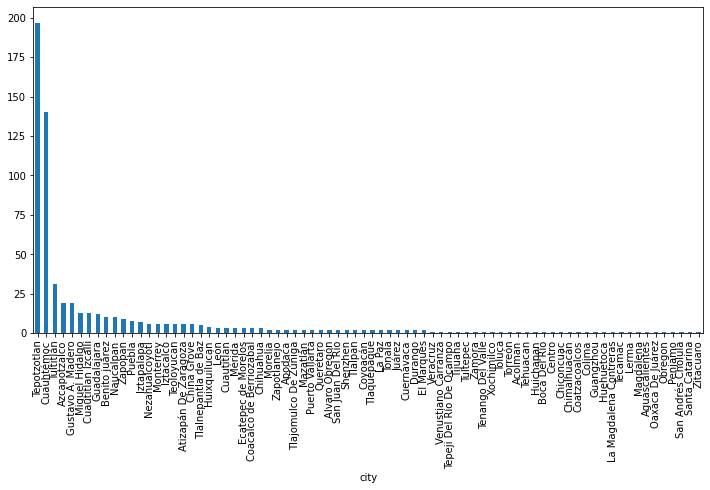

In [40]:
# Verificar concentración de vendedores en estado
df4.groupby('state')['seller_id'].nunique().sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))

# Verificar concentración de vendedores en ciudad
df4.groupby('city')['seller_id'].nunique().sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))


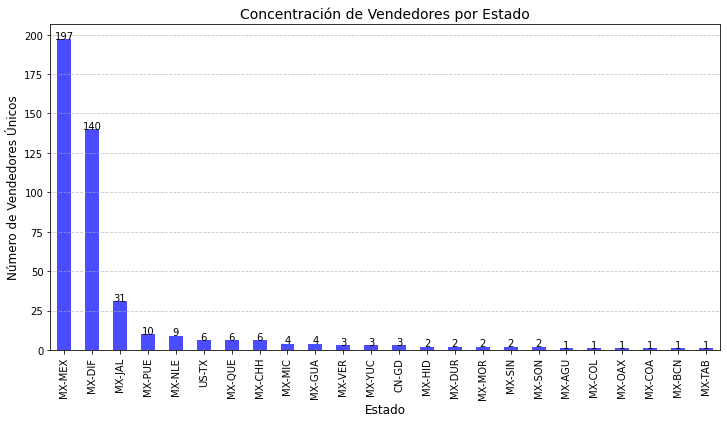

In [64]:
# Gráfico de concentración de vendedores por estado
state_vendors = df4.groupby('state')['seller_id'].nunique().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
state_vendors.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Concentración de Vendedores por Estado', fontsize=14)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Número de Vendedores Únicos', fontsize=12)

# Agregar etiquetas a las barras del gráfico de estado
for i, v in enumerate(state_vendors):
    plt.text(i, v + 0.2, str(v), ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

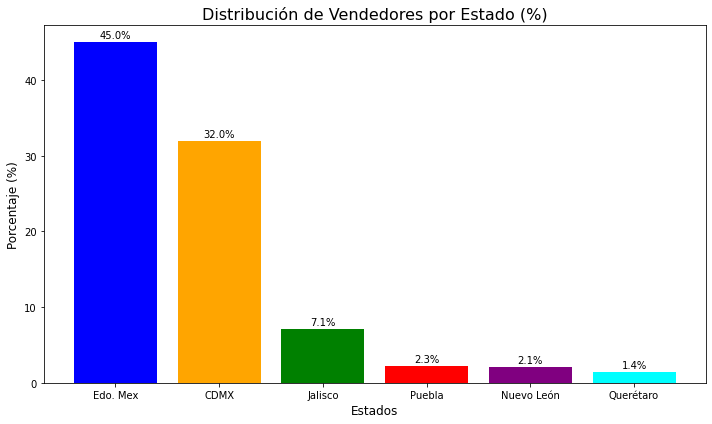

In [65]:
# Datos
estados = ['Edo. Mex', 'CDMX', 'Jalisco', 'Puebla', 'Nuevo León', 'Querétaro']
vendedores = [197, 140, 31, 10, 9, 6]
porcentajes = [(v / 438) * 100 for v in vendedores]

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.bar(estados, porcentajes, color=['blue', 'orange', 'green', 'red', 'purple', 'cyan'])

# Añadir etiquetas y título
plt.title('Distribución de Vendedores por Estado (%)', fontsize=16)
plt.xlabel('Estados', fontsize=12)
plt.ylabel('Porcentaje (%)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Mostrar valores en las barras
for i, pct in enumerate(porcentajes):
    plt.text(i, pct + 0.5, f'{pct:.1f}%', ha='center', fontsize=10)

# Mostrar la gráfica
plt.tight_layout()
plt.show()


In [41]:
df_cluster=df4.copy()

In [42]:
df_cluster.head(1)

,item_id,item_title,item_price,currency_id,available_quantity,condition,seller_id,seller_nickname,seller_country,seller_user_type,...,state,category_id,category_name,sub_category_id,sub_category_name,estimacion_ingresos,total_revenue,unique_products,products_per_state,products_per_city
0,MLM3518025342,Audífonos Inalámbricos Jbl Tune 510bt Jblt510b...,581.4,MXN,50,new,1986149970,BE20240910105902,MX,normal,...,MX-MEX,MLM1000,"Electrónica, Audio y Video",MLM438078,Audio,29070.0,37604.21,4,416,213


In [43]:
df_cluster['seller_id'].duplicated().sum()

475

In [44]:
# Eliminar duplicados de 'seller_id' 
df_cluster['seller_id'] = df_cluster['seller_id'].astype(str).str.strip()  #Convertir 'seller_id' a string 
df_cluster = df_cluster.drop_duplicates(subset='seller_id', keep='first')

In [45]:
df_cluster['seller_id'].duplicated().sum()

0

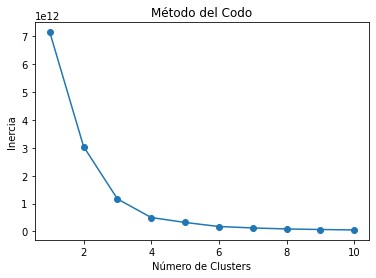

In [46]:
inertia_values = []

for k in range(1, 11):  # probar de 1 a 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_cluster[["item_price", "available_quantity", "estimacion_ingresos"]])  # Usa las columnas relevantes para clustering
    inertia_values.append(kmeans.inertia_)

# Graficar el "codo"
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title("Método del Codo")
plt.xlabel("Número de Clusters")
plt.ylabel("Inercia")
plt.show()


## Modelo K-means 
Para segmentar sellers

    seller_id  seller_segment
0  1986149970               1
1   423865692               3
2  1209411360               1
3   482152154               0
4   742974626               1


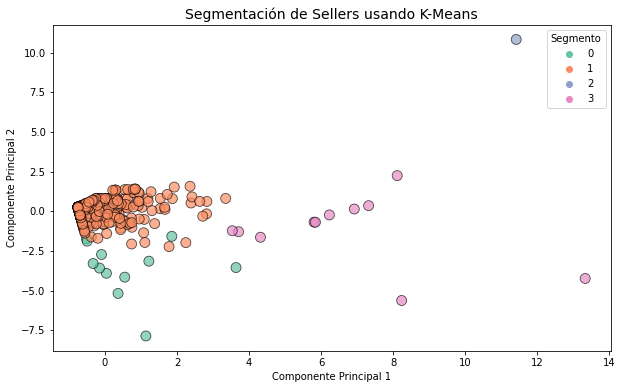

Centros de los clusters:
[[-0.03226231  0.82773927  0.18547449  4.7138275  -0.3352484 ]
 [-0.13643197 -0.10430452 -0.11913681 -0.14462808 -0.05572091]
 [ 1.68926977  0.34994565  5.43459131 -0.45172524 17.95531413]
 [ 5.01642836  2.99084131  3.78748675  0.34198363  0.83055667]]


In [47]:
# Selección de características relevantes basadas en el rendimiento del producto
features = df_cluster[['total_revenue', 'unique_products', 'estimacion_ingresos', 'item_price', 'available_quantity']]

# Normalización de las características (es importante para K-Means)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Aplicar KMeans con un número de clústeres 
kmeans = KMeans(n_clusters=4, random_state=42)
df_cluster['seller_segment'] = kmeans.fit_predict(features_scaled)

# Ver los primeros resultados
print(df_cluster[['seller_id', 'seller_segment']].head())

# Visualización: Distribución de los segmentos de los vendedores en un gráfico 2D (usando las primeras dos características)
plt.figure(figsize=(10, 6))

# Reducir las dimensiones para la visualización 
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)

# Graficar los puntos y usar el color según el cluster
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=df_cluster['seller_segment'], palette='Set2', s=100, edgecolor='k', alpha=0.7)
plt.title('Segmentación de Sellers usando K-Means', fontsize=14)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Segmento', loc='upper right')
plt.show()

# Para revisar los centros de los clusters
print("Centros de los clusters:")
print(kmeans.cluster_centers_)


In [48]:
df_cluster.groupby('seller_segment').mean()

,item_price,available_quantity,transactions.total,estimacion_ingresos,total_revenue,unique_products,products_per_state,products_per_city
seller_segment,,,,,,,,
0,11023.544167,9.166667,1.775975e+04,74258.044167,1.180237e+05,4.250000,199.416667,62.583333
1,795.492874,85.439614,3.642387e+04,35337.145048,7.219576e+04,1.811594,295.884058,81.144928
2,148.990000,5000.000000,1.159146e+06,744950.000000,8.753875e+05,3.000000,322.000000,130.000000
3,1819.910909,327.272727,4.013854e+05,534495.590909,2.339124e+06,9.909091,381.818182,74.363636
